In [1]:
%load_ext autoreload
%autoreload 2

from utils.setup_problem import Setup
from utils.misc import boundary_equation_2d
from utils.misc import visualize_result

import numpy as np
import pandas as pd
import cvxpy as cp

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
file_names_dict = {
    'supervised': ['L1', 'L2', 'L3'],
    'unsupervised': ['U'],
    'rule': ['rules']
}

data_dir_path = './inputs/toy_data'

In [14]:
problem_instance = Setup(data_dir_path, file_names_dict)

In [15]:
problem_instance.load_data()
problem_instance.load_rules()

In [16]:
problem_instance.KB_origin

[['p_1(x)', '→', 'p_2(x)'], ['p_2(x)', '→', 'p_3(x)']]

In [17]:
problem_instance.KB

[['¬', 'p_1(x)', '⊕', 'p_2(x)'], ['¬', 'p_2(x)', '⊕', 'p_3(x)']]

In [11]:
problem_instance.predicates_dict

{'p_1(x)': <utils.misc.Predicate at 0x7f7f7185a6e0>,
 'p_2(x)': <utils.misc.Predicate at 0x7f7f7185a890>,
 'p_3(x)': <utils.misc.Predicate at 0x7f7f7185aa40>}

In [18]:
problem_instance.identify_predicates()
problem_instance._construct_logical_constraints()

KB: [['¬', 'p_1(x)', '⊕', 'p_2(x)'], ['¬', 'p_2(x)', '⊕', 'p_3(x)']]
['¬', Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
['¬', Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
[[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
KB: [[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]
[[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
KB: [[Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())], [Expression(AFFINE, UNKNOWN, ()), '⊕', Expression(AFFINE, UNKNOWN, ())]]
[Expression(AFFINE, UNKNOWN, ()), '⊕'

[Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(

In [5]:
problem_instance.load_data()
problem_instance.load_rules()
problem_instance.identify_predicates()
constraints = problem_instance.construct_constraints()

In [22]:
for constraint in constraints:
    print(constraint)

1.0 + -2.0 @ var865[0, 0] <= -1.0 @ (2.0 @ (var864[0, 0:3][0] @ 0.1 + var864[0, 0:3][1] @ 0.5 + var864[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[0, 1] <= -1.0 @ (2.0 @ (var864[0, 0:3][0] @ 0.4 + var864[0, 0:3][1] @ 0.4 + var864[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[0, 2] <= 1.0 @ (2.0 @ (var864[0, 0:3][0] @ 0.3 + var864[0, 0:3][1] @ 0.8 + var864[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[0, 3] <= 1.0 @ (2.0 @ (var864[0, 0:3][0] @ 0.9 + var864[0, 0:3][1] @ 0.7 + var864[0, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[1, 0] <= -1.0 @ (2.0 @ (var864[1, 0:3][0] @ 0.1 + var864[1, 0:3][1] @ 0.3 + var864[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[1, 1] <= -1.0 @ (2.0 @ (var864[1, 0:3][0] @ 0.6 + var864[1, 0:3][1] @ 0.4 + var864[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[1, 2] <= 1.0 @ (2.0 @ (var864[1, 0:3][0] @ 0.2 + var864[1, 0:3][1] @ 0.8 + var864[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[1, 3] <= 1.0 @ (2.0 @ (var864[1, 0:3][0] @ 0.7 + var864[1, 0:3][1] @ 0.6 + var864[1, 0:3][2]) + -1.0)
1.0 + -2.0 @ var865[

In [20]:
constraints[0]

<bound method Constraint.value of Inequality(Expression(AFFINE, UNKNOWN, ()))>

In [6]:
constraints

[Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 In

In [55]:
file_names_dict = {
    'supervised': ['L1', 'L2', 'L3'],
    'unsupervised': ['U'],
    'rule': ['rules']
}

data_dir_path = './inputs/toy_data'

problem_instance = Setup(data_dir_path, file_names_dict)
objective, constraints = problem_instance.main(c1=10, c2=10)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Oct 15 08:41:48 AM: Your problem has 25 variables, 96 constraints, and 0 parameters.


(CVXPY) Oct 15 08:41:48 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 15 08:41:48 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 15 08:41:48 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 15 08:41:48 AM: Compiling problem (target solver=ECOS).
(CVXPY) Oct 15 08:41:48 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Oct 15 08:41:48 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 15 08:41:48 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 15 08:41:48 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 15 08:41:48 AM: Applying reduction ECOS
(CVXPY) Oc

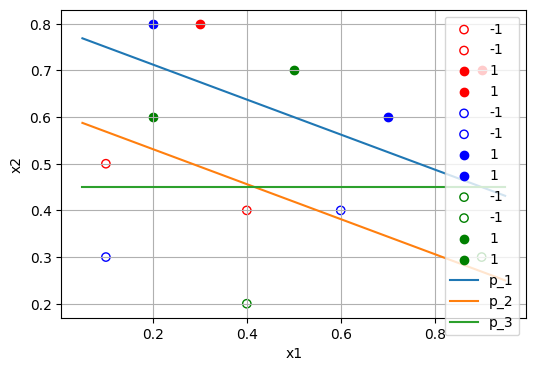

In [56]:
visualize_result(problem_instance)

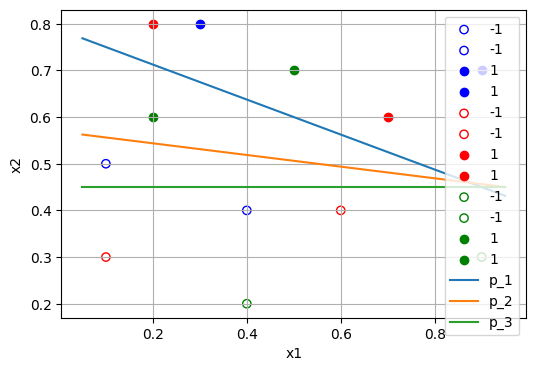

In [12]:
L = problem_instance.L
w_j = problem_instance.w_j


coeff_0 = w_j.value[0]
coeff_1 = w_j.value[1]
coeff_2 = w_j.value[2]
coeffs = [coeff_0, coeff_1, coeff_2]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1,1)

test_y_1 = boundary_equation_2d(test_x, coeff_0)
test_y_2 = boundary_equation_2d(test_x, coeff_1)
test_y_3 = boundary_equation_2d(test_x, coeff_2)



plt.figure(figsize=(6,4))
colors = ['blue', 'red', 'green']
cmap = plt.get_cmap('Set2')


for j in range(3):
    for l in range(4):
        if L[j][l, 2] == 1:
            plt.scatter(L[j][l, 0], L[j][l, 1], c=colors[j], marker='o', label='1')
        else:
            plt.scatter(L[j][l, 0], L[j][l, 1], facecolors='none', edgecolors=colors[j], marker='o', label='-1')

plt.plot(test_x, test_y_1, label="p_1")
plt.plot(test_x, test_y_2, label="p_2")
plt.plot(test_x, test_y_3, label="p_3")


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
problem_instance.xi_h

Variable((4, 1), nonneg=True)

In [17]:
problem_instance.xi_jl

Variable((3, 3), nonneg=True)